# longueur des planches de skateboard

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Le dataset 

In [5]:
# Générer un dataset aléatoire de mesures de longueurs de planches
data1 = np.random.normal(75, 10, 7000)  # skateboard
data2 = np.random.normal(115, 20, 3000) # longboard

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
#ax1.hist(data1, bins=100, density=True, alpha=0.6, color='b')
#ax2.hist(data2, bins=100, density=True, alpha=0.6, color='b');


In [6]:
data = np.concatenate((data1,data2))
len(data)

10000

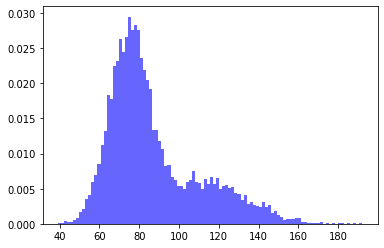

In [7]:
plt.hist(data, bins=100, density=True, alpha=0.6, color='b');

In [8]:
data.mean()

86.96395804433311

In [9]:
data.std()

22.9053850576514

In [10]:
n = 500

In [11]:
sample = np.random.choice(data, n, replace=True)

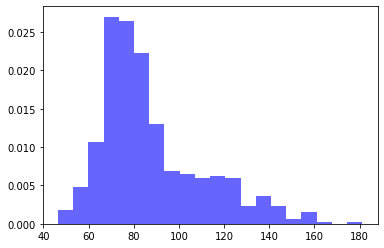

In [12]:
plt.hist(sample, bins=20, density=True, alpha=0.6, color='b');

In [13]:
sample.mean()

87.70412050414286

In [14]:
sample.std()

23.018351891830118

In [15]:
ste_mod = sample.std() / np.sqrt(n)
ste_mod

1.0294119912028605

In [16]:
means = []
for i in range(1000):
    sample = np.random.choice(data, n, replace=True)
    means.append(sample.mean())

In [17]:
ste_est = np.array(means).std()
ste_est

1.0086345645751496

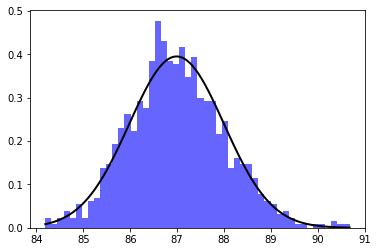

In [18]:
N = len(means)
num_bins = 50
plt.hist(means, bins=num_bins, density=True, alpha=0.6, color='b')

means = np.array(means)
x = np.linspace(means.min(), means.max(), 100)
bin_width = (means.max() - means.min()) / num_bins
p = norm.pdf(x, means.mean(), means.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)

In [19]:
def define_ste_est(n): 
    means = []
    for i in range(1000):
        sample = np.random.choice(data, n, replace=True)
        means.append(sample.mean())
    return [np.array(means).std()]

In [20]:
def define_ste_sample(n):
    sample = np.random.choice(data, n, replace=True)
    return sample.std() / np.sqrt(n)

In [21]:
def define_ste_fit(n):
    sample = np.random.choice(data, n, replace=True)
    return data.std() / np.sqrt(n)

In [22]:
sample_lens = np.arange(50, 500, 1)
ste_ests = [define_ste_est(n) for n in sample_lens]
ste_samples = [define_ste_sample(n) for n in sample_lens]
ste_fits = [define_ste_fit(n) for n in sample_lens]

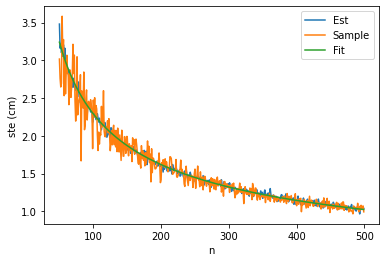

In [26]:
plt.plot(sample_lens, ste_ests, label = "Est")
plt.plot(sample_lens, ste_samples, label = "Sample")
plt.plot(sample_lens, ste_fits, label = "Fit")
plt.xlabel('n')
plt.ylabel('ste (cm)')
plt.legend()
